<a href="https://colab.research.google.com/github/Shreyash-0699/Pytorch-learning/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden Layer 1 (some number of neurons)
  # --> Hidden Layer 2 (n) --> Output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantize our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
# Change last column from string to float

my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
# Train Test Split X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# Convert these to numpy arrays
X = X.values
y = y.values

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [11]:
# Convert X features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Set the criterion of model to measure the error, how far off the predictions are from actual data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [14]:
# Train our model
# Epochs? (One run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)  # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values as the y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propogation: take the error rate of forward propogation and feed it back
  # through the network to fine tune its weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.2679471969604492
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651433467865
Epoch: 90 and loss: 0.06522615998983383


Text(0.5, 0, 'Epochs')

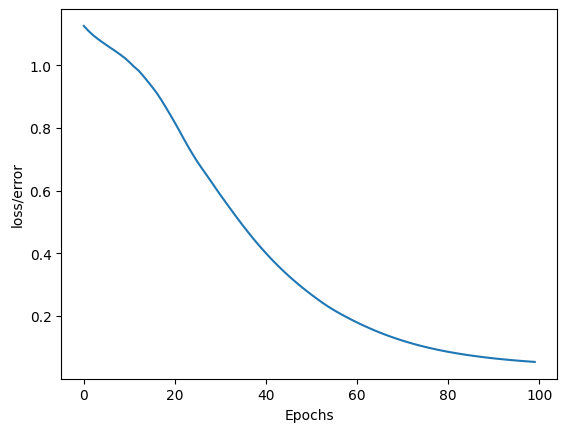

In [15]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")

In [16]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)  # Find the loss or error

In [17]:
loss

tensor(0.1315)

In [18]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # will tell us what type of flower our network think it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} correct!")

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1
5.) tensor([-7.1838,  4.8757,  8.3024]) 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0
21.) tensor([-2.6161,  4.5584,  0.8575]) 	 1
22.) tensor([-7.7427,  4.7379,  9.4233]) 	 2
23.) tensor([ 3.577

In [19]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [20]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [21]:
# Save our NN Model

torch.save(model.state_dict(), 'my_iris_model.pt')

In [22]:
# Load the Saved Model

new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [23]:
# Make sure its loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)